<a href="https://colab.research.google.com/github/Ayrsz/SignalAndSistemyProject/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [265]:
#ML
import sklearn as sk

#Scientific computation
import numpy as np
import jax
import jax.numpy as jnp

#Plot and view
from matplotlib import pyplot as plt
import IPython as ipy
from IPython import display
from IPython.display import Audio

#Data manipulation
import os
import gc
import pandas as pd
import cv2 as cv

#Audio manipulation
import librosa
import soundfile as sf


In [266]:
from zipfile import ZipFile
try:
    from google.colab import drive
    drive.mount("/content/drive", force_remount= True)
except Exception as e:
    print(e)
    print("Código rodando localmente")

path_root = "/home/mas11/Documents/Datasets"


No module named 'google.colab'
Código rodando localmente


# Dataset config

In [267]:
data = pd.read_csv(path_root + "/Data/feats.csv")
data.head()

,name,dir_image,rms_mean,rms_std,zero_cross_mean,zero_cross_std,amplitude_envelope_mean,amplitude_envelope_std,spectral_centroid_mean,spectral_centroid_std,...,mfcc#09_std,mfcc#10_mean,mfcc#10_std,mfcc#11_mean,mfcc#11_std,mfcc#12_mean,mfcc#12_std,tempo,kurtosis,label
0,classical.00521.wav,/home/mas11/Documents/Datasets/Data/images/cla...,0.0146,0.0044,0.0578,0.0199,0.0379,0.0154,1117.6166,245.9990,...,7.0562,-9.1809,7.6074,-0.9181,5.9257,-7.7351,6.7801,[103],0.0003,classical
1,classical.00270.wav,/home/mas11/Documents/Datasets/Data/images/cla...,0.0327,0.0151,0.0510,0.0132,0.0838,0.0463,877.7520,181.0869,...,6.4792,-4.6224,7.2181,-10.0690,7.6384,-4.8233,7.2265,[123],0.0122,classical
2,classical.00232.wav,/home/mas11/Documents/Datasets/Data/images/cla...,0.0285,0.0092,0.0431,0.0085,0.0693,0.0264,483.7629,54.6803,...,9.4247,-4.2221,7.9807,-1.1659,6.6576,0.4751,9.2323,0,0.0030,classical
3,classical.00014.wav,/home/mas11/Documents/Datasets/Data/images/cla...,0.0334,0.0216,0.0684,0.0240,0.0839,0.0695,1279.5155,313.6353,...,8.8088,-8.1923,8.0725,-0.8276,9.9700,0.9924,12.2557,[143],0.1818,classical
4,classical.00597.wav,/home/mas11/Documents/Datasets/Data/images/cla...,0.0633,0.0283,0.0533,0.0175,0.1570,0.0831,902.6686,166.2904,...,6.9916,-10.4254,8.0424,-1.1135,9.4015,-4.6708,9.5551,[135],0.1320,classical


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     5994 non-null   object 
 1   dir_image                5994 non-null   object 
 2   rms_mean                 5994 non-null   float64
 3   rms_std                  5994 non-null   float64
 4   zero_cross_mean          5994 non-null   float64
 5   zero_cross_std           5994 non-null   float64
 6   amplitude_envelope_mean  5994 non-null   float64
 7   amplitude_envelope_std   5994 non-null   float64
 8   spectral_centroid_mean   5994 non-null   float64
 9   spectral_centroid_std    5994 non-null   float64
 10  mfcc#00_mean             5994 non-null   float64
 11  mfcc#00_std              5994 non-null   float64
 12  mfcc#01_mean             5994 non-null   float64
 13  mfcc#01_std              5994 non-null   float64
 14  mfcc#02_mean            

# Treating data

In [269]:
unvetorize = lambda num: float(num.strip("[]"))


data["tempo"] = data["tempo"].apply(unvetorize)

#Alguns estão com tempo 0, vou resolver
data = data[data["tempo"] != 0]

In [270]:
change_dir = lambda path: path.replace('Datasets', 'Datasets/Data')
data["dir_image"] = data["dir_image"].apply(change_dir)

In [271]:
# Dicionario, label -> Idx (labelEnconder)
#Transformar classes em numeros
label_mapping = {label: int(idx) for idx, label in enumerate(data["label"].unique())}
label_unmapping = {int(idx) : label for label, idx in label_mapping.items()}
data["label"] = data["label"].map(label_mapping)

In [281]:
normer = lambda x: 10*x     
data["rms_mean"] = data["rms_mean"].pipe(normer)

In [272]:
data = data.dropna()

# Analise exploratória

90.88000000000001


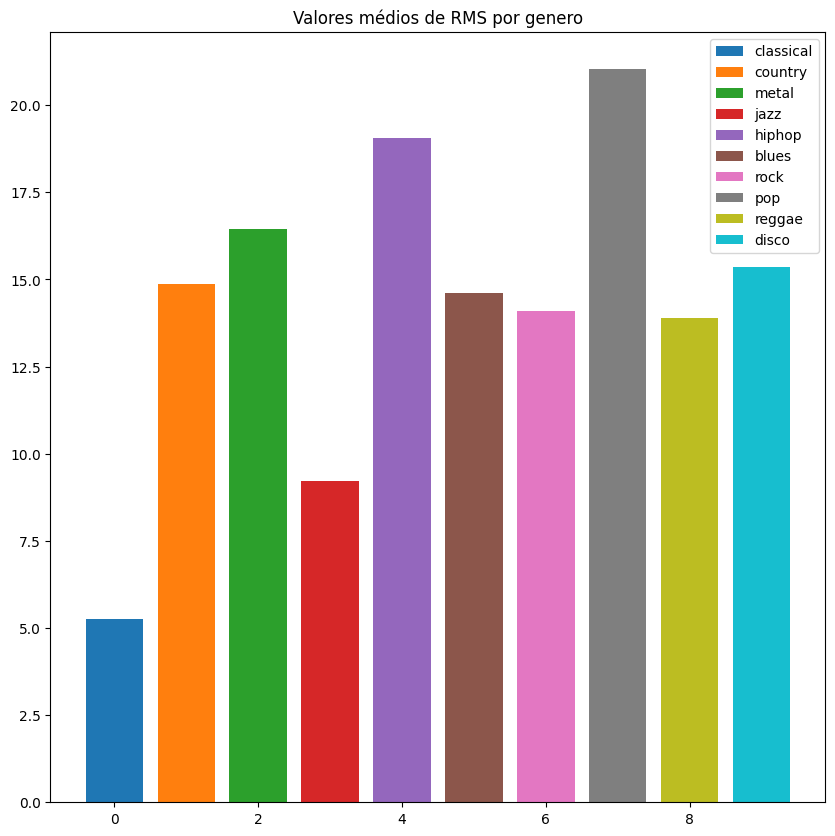

In [282]:
def plot_rms_per_genre(df):
    labels = np.unique(df["label"])
    means = {}


    print(df["rms_mean"].max())
    for label in labels:

        df.head()
        
        name_genre = label_unmapping[label]

        rms_genre = df[df["label"] == label]["rms_mean"]
        mean = rms_genre.mean()
        means[name_genre] = mean

    i = 0
    plt.figure(figsize= (10, 10))
    plt.title("Valores médios de RMS por genero")
    for (label, value) in means.items():
        plt.bar(i, value)
        i = i + 1
    
    plt.legend(means.keys())
   # plt.

plot_rms_per_genre(data)
#data.head()


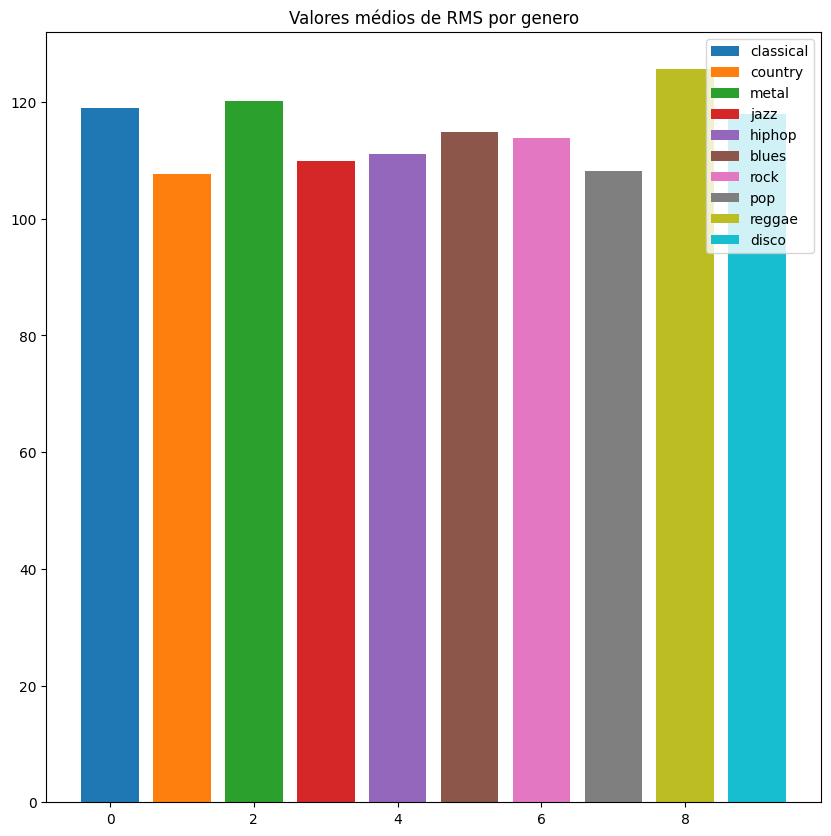

In [283]:
def plot_tempo(df):
    labels = np.unique(df["label"])
    means = {}

    for label in labels:

        df.head()
        
        name_genre = label_unmapping[label]

        tempo_genere = df[df["label"] == label]["tempo"]
        mean = tempo_genere.mean()
        means[name_genre] = mean

    i = 0
    plt.figure(figsize= (10, 10))
    plt.title("Valores médios de RMS por genero")
    for (label, value) in means.items():
        plt.bar(i, value)
        i = i + 1
    
    plt.legend(means.keys())
   # plt.

plot_tempo(data)
#data.head()
    

# Modelo

In [289]:
non_feat = ["label", "dir_image", "name", "kurtosis"]

columns = data.columns
data_feat = data.drop(columns = non_feat)
data_non_feat = data.drop(columns = data_feat.columns)

names = data["name"]
dir_imgs = data["dir_image"]
labels = data["label"]

labels.head()


0    0
1    0
3    0
4    0
5    0
Name: label, dtype: int64

In [291]:
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(data_feat, labels, test_size= 0.2)

In [292]:
model = sk.ensemble.GradientBoostingClassifier()
model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [293]:
pred = model.predict(X_test)
print(f"Numero de erros  {np.sum(pred != Y_test)}")
print(f"Numero acertos, {np.sum(pred == Y_test)}")
print(f"Precisão : {np.sum(pred == Y_test)*100/len(pred)}%")


Numero de erros  391
Numero acertos, 803
Precisão : 67.25293132328308%


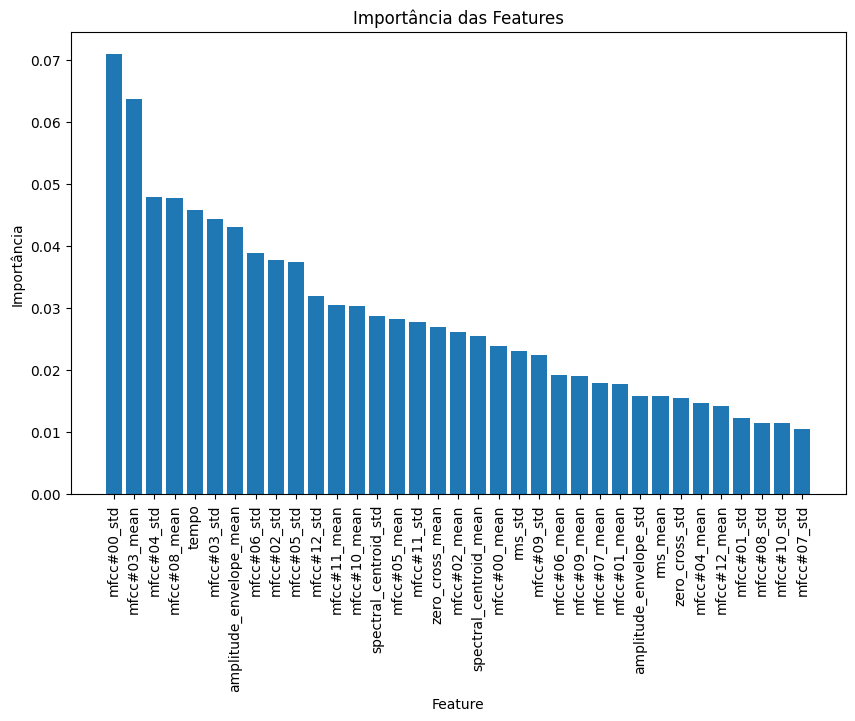

In [294]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(data_feat.columns)[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importância")
plt.show()